<a href="https://colab.research.google.com/github/kartikgill/The-GAN-Book/blob/main/Skill-02/Generative-Adversarial-Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [ ]:
import tensorflow
print (tensorflow.__version__)

2.4.0


Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


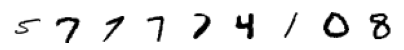

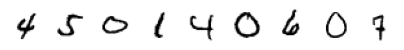

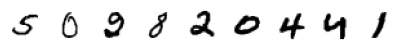

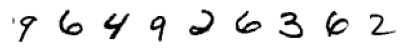

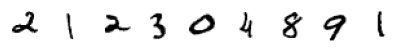

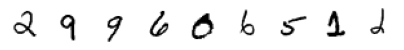

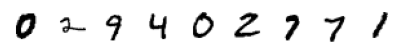

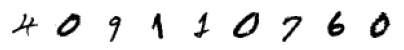

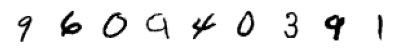

In [ ]:
from tensorflow.keras.datasets import fashion_mnist, mnist

(trainX, trainY), (testX, testY) = mnist.load_data()

print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testY.shape))


for k in range(9):
    plt.figure(figsize=(7, 7))
    for j in range(9):
        i = np.random.randint(0, 10000)
        plt.subplot(990 + 1 + j)
        plt.imshow(trainX[i], cmap='gray_r')
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

In [ ]:
trainX = [image/255.0 for image in trainX]
testX = [image/255.0 for image in testX]

trainX = np.reshape(trainX, (60000, 28, 28, 1))
testX = np.reshape(testX, (10000, 28, 28, 1))

print (trainX.shape, testX.shape, trainY.shape, testY.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


# Generator Model

In [ ]:
random_input = tensorflow.keras.layers.Input(shape = 50)

x = tensorflow.keras.layers.Dense(1200, activation='relu')(random_input)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)
x = tensorflow.keras.layers.Dense(1000, activation='relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)
x = tensorflow.keras.layers.Dense(28*28)(x)
x = tensorflow.keras.layers.Reshape((28, 28, 1))(x)

generated_image = tensorflow.keras.layers.Activation('sigmoid')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1200)              61200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1200)              4800      
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1201000   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1000)              4000      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               784784    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0   

# Discriminator

In [ ]:
image_input = tensorflow.keras.layers.Input(shape=(28, 28, 1))

x = tensorflow.keras.layers.Flatten()(image_input)
x = tensorflow.keras.layers.Dense(256, activation='relu')(x)
x = tensorflow.keras.layers.Dropout(0.3)(x)
x = tensorflow.keras.layers.Dense(128, activation='relu')(x)
x = tensorflow.keras.layers.Dropout(0.5)(x)
x = tensorflow.keras.layers.Dense(1)(x)

real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129 

In [ ]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.00005, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# GAN

In [ ]:
discriminator_network.trainable=False

g_output = generator_network(random_input)
d_output = discriminator_network(g_output)

gan_model = tensorflow.keras.models.Model(random_input, d_output)
gan_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
model_1 (Functional)         (None, 28, 28, 1)         2055784   
_________________________________________________________________
model_3 (Functional)         (None, 1)                 233985    
Total params: 2,289,769
Trainable params: 2,051,384
Non-trainable params: 238,385
_________________________________________________________________


# Compiling Models

In [ ]:
gan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [ ]:
# Indices of Zero Images
indices = [i for i in range(len(trainX))]

def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = trainX[np.array(random_indices),:]
    return real_images

def show_generator_results(generator_network):
    for k in range(9):
        plt.figure(figsize=(7, 7))
        fake_samples = get_fake_samples(generator_network, 9, noise_size)
        for j in range(9):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[j,:,:,-1], cmap='gray_r')
            plt.axis('off')
            #plt.title(trainY[i])
        plt.show()
    return

# Training GAN

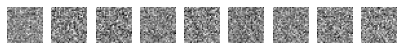

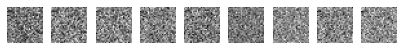

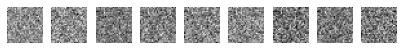

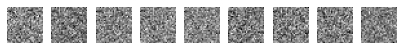

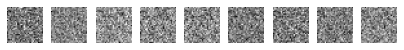

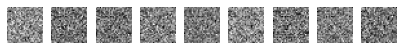

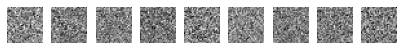

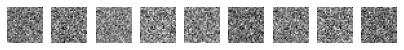

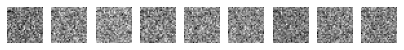

Epoch:0, Step:0, D-Loss:0.798, D-Acc:54.000, G-Loss:0.519
Epoch:0, Step:50, D-Loss:0.127, D-Acc:100.000, G-Loss:3.190
Epoch:0, Step:100, D-Loss:0.039, D-Acc:100.000, G-Loss:5.013
Epoch:0, Step:150, D-Loss:0.034, D-Acc:99.000, G-Loss:6.396
Epoch:0, Step:200, D-Loss:0.017, D-Acc:100.000, G-Loss:7.363
Epoch:0, Step:250, D-Loss:0.022, D-Acc:100.000, G-Loss:9.171
Epoch:0, Step:300, D-Loss:0.010, D-Acc:100.000, G-Loss:10.002
Epoch:0, Step:350, D-Loss:0.026, D-Acc:99.000, G-Loss:12.115
Epoch:0, Step:400, D-Loss:0.058, D-Acc:98.000, G-Loss:13.406
Epoch:0, Step:450, D-Loss:0.098, D-Acc:97.000, G-Loss:13.396
Epoch:1, Step:0, D-Loss:0.094, D-Acc:98.000, G-Loss:11.440
Epoch:1, Step:50, D-Loss:0.128, D-Acc:95.000, G-Loss:11.614
Epoch:1, Step:100, D-Loss:0.163, D-Acc:94.000, G-Loss:11.277
Epoch:1, Step:150, D-Loss:0.091, D-Acc:97.000, G-Loss:10.763
Epoch:1, Step:200, D-Loss:0.102, D-Acc:98.000, G-Loss:11.872
Epoch:1, Step:250, D-Loss:0.089, D-Acc:97.000, G-Loss:11.978
Epoch:1, Step:300, D-Loss:0.139

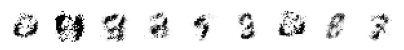

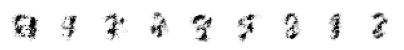

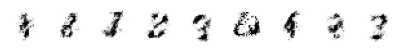

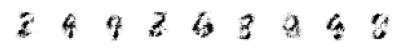

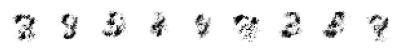

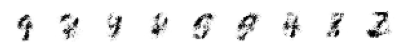

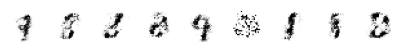

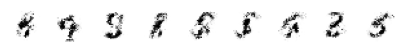

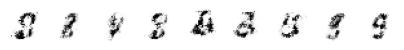

Epoch:10, Step:0, D-Loss:0.408, D-Acc:79.000, G-Loss:1.644
Epoch:10, Step:50, D-Loss:0.304, D-Acc:86.000, G-Loss:1.715
Epoch:10, Step:100, D-Loss:0.386, D-Acc:81.000, G-Loss:1.936
Epoch:10, Step:150, D-Loss:0.385, D-Acc:87.000, G-Loss:1.811
Epoch:10, Step:200, D-Loss:0.476, D-Acc:76.000, G-Loss:1.497
Epoch:10, Step:250, D-Loss:0.441, D-Acc:76.000, G-Loss:1.761
Epoch:10, Step:300, D-Loss:0.337, D-Acc:89.000, G-Loss:1.517
Epoch:10, Step:350, D-Loss:0.402, D-Acc:82.000, G-Loss:1.832
Epoch:10, Step:400, D-Loss:0.410, D-Acc:83.000, G-Loss:1.693
Epoch:10, Step:450, D-Loss:0.312, D-Acc:87.000, G-Loss:1.558
Epoch:11, Step:0, D-Loss:0.320, D-Acc:87.000, G-Loss:1.561
Epoch:11, Step:50, D-Loss:0.310, D-Acc:90.000, G-Loss:1.846
Epoch:11, Step:100, D-Loss:0.352, D-Acc:86.000, G-Loss:1.716
Epoch:11, Step:150, D-Loss:0.534, D-Acc:76.000, G-Loss:1.610
Epoch:11, Step:200, D-Loss:0.334, D-Acc:87.000, G-Loss:1.648
Epoch:11, Step:250, D-Loss:0.289, D-Acc:88.000, G-Loss:1.466
Epoch:11, Step:300, D-Loss:0.3

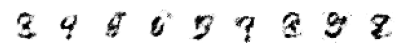

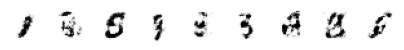

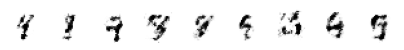

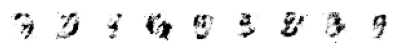

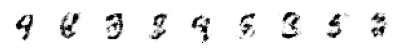

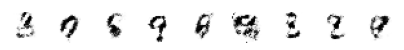

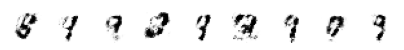

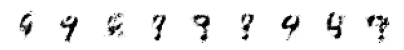

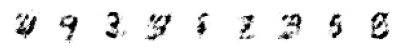

Epoch:20, Step:0, D-Loss:0.465, D-Acc:76.000, G-Loss:1.415
Epoch:20, Step:50, D-Loss:0.457, D-Acc:79.000, G-Loss:1.386
Epoch:20, Step:100, D-Loss:0.407, D-Acc:81.000, G-Loss:1.490
Epoch:20, Step:150, D-Loss:0.352, D-Acc:82.000, G-Loss:1.398
Epoch:20, Step:200, D-Loss:0.522, D-Acc:71.000, G-Loss:1.490
Epoch:20, Step:250, D-Loss:0.473, D-Acc:81.000, G-Loss:1.385
Epoch:20, Step:300, D-Loss:0.438, D-Acc:79.000, G-Loss:1.357
Epoch:20, Step:350, D-Loss:0.554, D-Acc:65.000, G-Loss:1.418
Epoch:20, Step:400, D-Loss:0.446, D-Acc:80.000, G-Loss:1.396
Epoch:20, Step:450, D-Loss:0.444, D-Acc:79.000, G-Loss:1.458
Epoch:21, Step:0, D-Loss:0.453, D-Acc:74.000, G-Loss:1.436
Epoch:21, Step:50, D-Loss:0.459, D-Acc:79.000, G-Loss:1.409
Epoch:21, Step:100, D-Loss:0.420, D-Acc:79.000, G-Loss:1.269
Epoch:21, Step:150, D-Loss:0.516, D-Acc:75.000, G-Loss:1.345
Epoch:21, Step:200, D-Loss:0.521, D-Acc:75.000, G-Loss:1.549
Epoch:21, Step:250, D-Loss:0.461, D-Acc:76.000, G-Loss:1.491
Epoch:21, Step:300, D-Loss:0.3

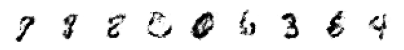

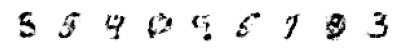

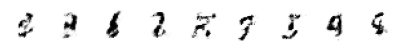

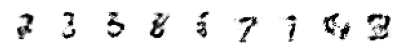

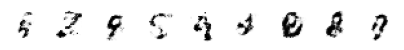

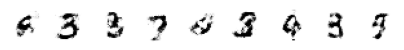

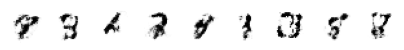

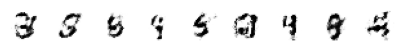

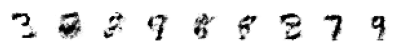

Epoch:30, Step:0, D-Loss:0.470, D-Acc:79.000, G-Loss:1.145
Epoch:30, Step:50, D-Loss:0.494, D-Acc:75.000, G-Loss:1.179
Epoch:30, Step:100, D-Loss:0.518, D-Acc:73.000, G-Loss:1.157
Epoch:30, Step:150, D-Loss:0.471, D-Acc:78.000, G-Loss:1.137
Epoch:30, Step:200, D-Loss:0.474, D-Acc:77.000, G-Loss:1.269
Epoch:30, Step:250, D-Loss:0.564, D-Acc:71.000, G-Loss:1.113
Epoch:30, Step:300, D-Loss:0.615, D-Acc:64.000, G-Loss:1.168
Epoch:30, Step:350, D-Loss:0.528, D-Acc:71.000, G-Loss:1.222
Epoch:30, Step:400, D-Loss:0.484, D-Acc:78.000, G-Loss:1.154
Epoch:30, Step:450, D-Loss:0.580, D-Acc:66.000, G-Loss:1.173
Epoch:31, Step:0, D-Loss:0.525, D-Acc:75.000, G-Loss:1.185
Epoch:31, Step:50, D-Loss:0.547, D-Acc:73.000, G-Loss:1.175
Epoch:31, Step:100, D-Loss:0.534, D-Acc:70.000, G-Loss:1.201
Epoch:31, Step:150, D-Loss:0.575, D-Acc:70.000, G-Loss:1.166
Epoch:31, Step:200, D-Loss:0.568, D-Acc:69.000, G-Loss:1.135
Epoch:31, Step:250, D-Loss:0.550, D-Acc:73.000, G-Loss:1.136
Epoch:31, Step:300, D-Loss:0.5

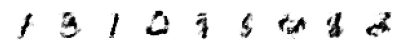

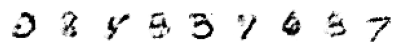

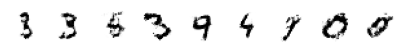

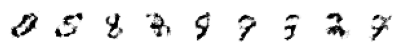

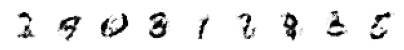

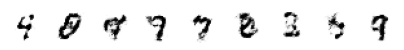

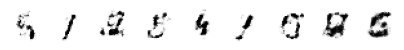

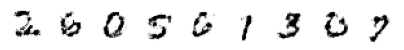

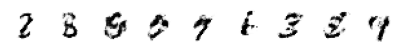

Epoch:40, Step:0, D-Loss:0.481, D-Acc:76.000, G-Loss:0.994
Epoch:40, Step:50, D-Loss:0.609, D-Acc:67.000, G-Loss:1.070
Epoch:40, Step:100, D-Loss:0.658, D-Acc:62.000, G-Loss:1.021
Epoch:40, Step:150, D-Loss:0.599, D-Acc:68.000, G-Loss:0.950
Epoch:40, Step:200, D-Loss:0.542, D-Acc:72.000, G-Loss:1.077
Epoch:40, Step:250, D-Loss:0.492, D-Acc:77.000, G-Loss:1.044
Epoch:40, Step:300, D-Loss:0.553, D-Acc:67.000, G-Loss:0.950
Epoch:40, Step:350, D-Loss:0.584, D-Acc:65.000, G-Loss:0.985
Epoch:40, Step:400, D-Loss:0.609, D-Acc:63.000, G-Loss:0.998
Epoch:40, Step:450, D-Loss:0.598, D-Acc:70.000, G-Loss:0.998
Epoch:41, Step:0, D-Loss:0.605, D-Acc:64.000, G-Loss:0.960
Epoch:41, Step:50, D-Loss:0.546, D-Acc:72.000, G-Loss:0.976
Epoch:41, Step:100, D-Loss:0.579, D-Acc:69.000, G-Loss:1.051
Epoch:41, Step:150, D-Loss:0.654, D-Acc:69.000, G-Loss:1.081
Epoch:41, Step:200, D-Loss:0.612, D-Acc:63.000, G-Loss:0.935
Epoch:41, Step:250, D-Loss:0.587, D-Acc:67.000, G-Loss:0.999
Epoch:41, Step:300, D-Loss:0.5

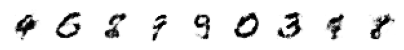

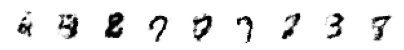

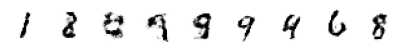

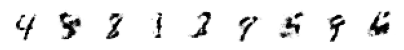

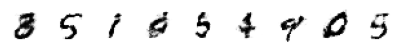

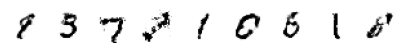

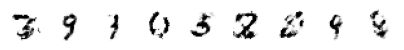

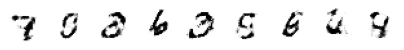

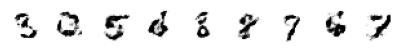

Epoch:50, Step:0, D-Loss:0.541, D-Acc:74.000, G-Loss:0.953
Epoch:50, Step:50, D-Loss:0.617, D-Acc:67.000, G-Loss:0.945
Epoch:50, Step:100, D-Loss:0.536, D-Acc:76.000, G-Loss:0.960
Epoch:50, Step:150, D-Loss:0.716, D-Acc:55.000, G-Loss:0.893
Epoch:50, Step:200, D-Loss:0.626, D-Acc:64.000, G-Loss:0.918
Epoch:50, Step:250, D-Loss:0.624, D-Acc:63.000, G-Loss:0.895
Epoch:50, Step:300, D-Loss:0.601, D-Acc:68.000, G-Loss:0.940
Epoch:50, Step:350, D-Loss:0.654, D-Acc:62.000, G-Loss:0.942
Epoch:50, Step:400, D-Loss:0.568, D-Acc:67.000, G-Loss:0.900
Epoch:50, Step:450, D-Loss:0.592, D-Acc:67.000, G-Loss:0.941
Epoch:51, Step:0, D-Loss:0.658, D-Acc:62.000, G-Loss:0.895
Epoch:51, Step:50, D-Loss:0.613, D-Acc:66.000, G-Loss:0.887
Epoch:51, Step:100, D-Loss:0.628, D-Acc:66.000, G-Loss:0.976
Epoch:51, Step:150, D-Loss:0.657, D-Acc:61.000, G-Loss:0.947
Epoch:51, Step:200, D-Loss:0.584, D-Acc:71.000, G-Loss:0.867
Epoch:51, Step:250, D-Loss:0.656, D-Acc:59.000, G-Loss:0.873
Epoch:51, Step:300, D-Loss:0.6

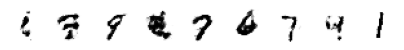

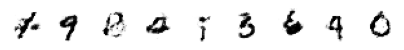

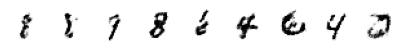

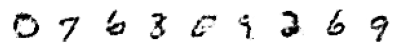

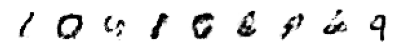

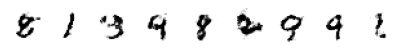

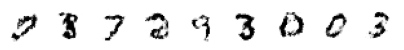

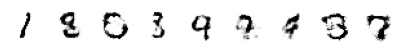

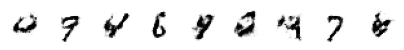

Epoch:60, Step:0, D-Loss:0.600, D-Acc:64.000, G-Loss:0.883
Epoch:60, Step:50, D-Loss:0.652, D-Acc:57.000, G-Loss:0.870
Epoch:60, Step:100, D-Loss:0.652, D-Acc:64.000, G-Loss:0.860
Epoch:60, Step:150, D-Loss:0.639, D-Acc:67.000, G-Loss:0.911
Epoch:60, Step:200, D-Loss:0.663, D-Acc:57.000, G-Loss:0.859
Epoch:60, Step:250, D-Loss:0.640, D-Acc:59.000, G-Loss:0.890
Epoch:60, Step:300, D-Loss:0.702, D-Acc:53.000, G-Loss:0.869
Epoch:60, Step:350, D-Loss:0.605, D-Acc:70.000, G-Loss:0.877
Epoch:60, Step:400, D-Loss:0.633, D-Acc:63.000, G-Loss:0.889
Epoch:60, Step:450, D-Loss:0.644, D-Acc:65.000, G-Loss:0.873
Epoch:61, Step:0, D-Loss:0.644, D-Acc:64.000, G-Loss:0.804
Epoch:61, Step:50, D-Loss:0.673, D-Acc:57.000, G-Loss:0.838
Epoch:61, Step:100, D-Loss:0.682, D-Acc:54.000, G-Loss:0.892
Epoch:61, Step:150, D-Loss:0.570, D-Acc:70.000, G-Loss:0.883
Epoch:61, Step:200, D-Loss:0.681, D-Acc:58.000, G-Loss:0.877
Epoch:61, Step:250, D-Loss:0.591, D-Acc:67.000, G-Loss:0.922
Epoch:61, Step:300, D-Loss:0.6

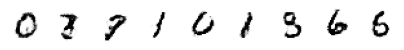

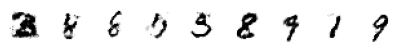

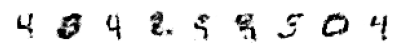

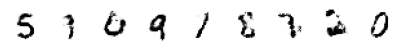

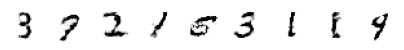

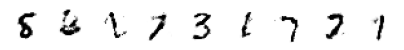

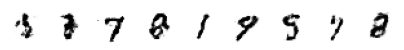

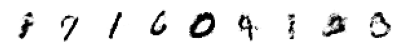

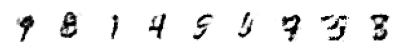

Epoch:70, Step:0, D-Loss:0.672, D-Acc:62.000, G-Loss:0.843
Epoch:70, Step:50, D-Loss:0.661, D-Acc:57.000, G-Loss:0.785
Epoch:70, Step:100, D-Loss:0.639, D-Acc:58.000, G-Loss:0.854
Epoch:70, Step:150, D-Loss:0.654, D-Acc:61.000, G-Loss:0.831
Epoch:70, Step:200, D-Loss:0.704, D-Acc:51.000, G-Loss:0.815
Epoch:70, Step:250, D-Loss:0.669, D-Acc:58.000, G-Loss:0.818
Epoch:70, Step:300, D-Loss:0.658, D-Acc:56.000, G-Loss:0.844
Epoch:70, Step:350, D-Loss:0.658, D-Acc:57.000, G-Loss:0.861
Epoch:70, Step:400, D-Loss:0.636, D-Acc:64.000, G-Loss:0.842
Epoch:70, Step:450, D-Loss:0.630, D-Acc:62.000, G-Loss:0.897
Epoch:71, Step:0, D-Loss:0.627, D-Acc:62.000, G-Loss:0.793
Epoch:71, Step:50, D-Loss:0.639, D-Acc:63.000, G-Loss:0.812
Epoch:71, Step:100, D-Loss:0.652, D-Acc:62.000, G-Loss:0.841
Epoch:71, Step:150, D-Loss:0.663, D-Acc:56.000, G-Loss:0.831
Epoch:71, Step:200, D-Loss:0.659, D-Acc:62.000, G-Loss:0.791
Epoch:71, Step:250, D-Loss:0.615, D-Acc:66.000, G-Loss:0.861
Epoch:71, Step:300, D-Loss:0.6

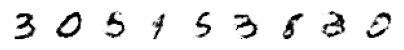

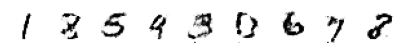

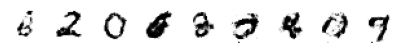

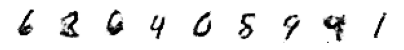

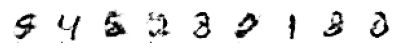

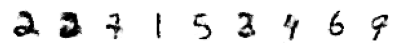

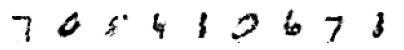

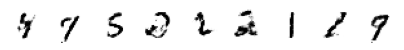

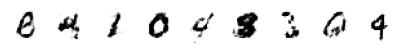

Epoch:80, Step:0, D-Loss:0.631, D-Acc:61.000, G-Loss:0.818
Epoch:80, Step:50, D-Loss:0.648, D-Acc:63.000, G-Loss:0.850
Epoch:80, Step:100, D-Loss:0.675, D-Acc:58.000, G-Loss:0.822
Epoch:80, Step:150, D-Loss:0.628, D-Acc:67.000, G-Loss:0.827
Epoch:80, Step:200, D-Loss:0.662, D-Acc:56.000, G-Loss:0.778
Epoch:80, Step:250, D-Loss:0.685, D-Acc:58.000, G-Loss:0.832
Epoch:80, Step:300, D-Loss:0.644, D-Acc:62.000, G-Loss:0.822
Epoch:80, Step:350, D-Loss:0.602, D-Acc:69.000, G-Loss:0.796
Epoch:80, Step:400, D-Loss:0.642, D-Acc:63.000, G-Loss:0.798
Epoch:80, Step:450, D-Loss:0.667, D-Acc:61.000, G-Loss:0.837
Epoch:81, Step:0, D-Loss:0.616, D-Acc:73.000, G-Loss:0.788
Epoch:81, Step:50, D-Loss:0.659, D-Acc:56.000, G-Loss:0.826
Epoch:81, Step:100, D-Loss:0.702, D-Acc:48.000, G-Loss:0.893
Epoch:81, Step:150, D-Loss:0.669, D-Acc:58.000, G-Loss:0.810
Epoch:81, Step:200, D-Loss:0.655, D-Acc:60.000, G-Loss:0.828
Epoch:81, Step:250, D-Loss:0.654, D-Acc:60.000, G-Loss:0.820
Epoch:81, Step:300, D-Loss:0.6

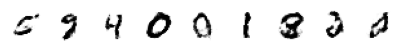

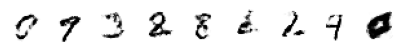

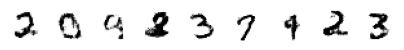

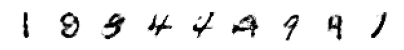

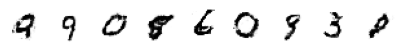

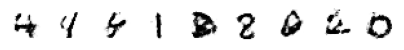

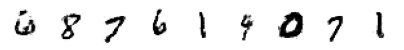

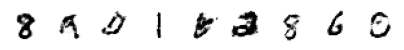

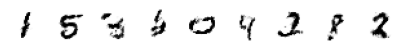

Epoch:90, Step:0, D-Loss:0.663, D-Acc:64.000, G-Loss:0.845
Epoch:90, Step:50, D-Loss:0.642, D-Acc:63.000, G-Loss:0.857
Epoch:90, Step:100, D-Loss:0.674, D-Acc:62.000, G-Loss:0.888
Epoch:90, Step:150, D-Loss:0.592, D-Acc:70.000, G-Loss:0.856
Epoch:90, Step:200, D-Loss:0.677, D-Acc:57.000, G-Loss:0.819
Epoch:90, Step:250, D-Loss:0.694, D-Acc:64.000, G-Loss:0.807
Epoch:90, Step:300, D-Loss:0.669, D-Acc:64.000, G-Loss:0.824
Epoch:90, Step:350, D-Loss:0.626, D-Acc:61.000, G-Loss:0.855
Epoch:90, Step:400, D-Loss:0.651, D-Acc:65.000, G-Loss:0.873
Epoch:90, Step:450, D-Loss:0.669, D-Acc:55.000, G-Loss:0.767
Epoch:91, Step:0, D-Loss:0.701, D-Acc:50.000, G-Loss:0.824
Epoch:91, Step:50, D-Loss:0.626, D-Acc:63.000, G-Loss:0.833
Epoch:91, Step:100, D-Loss:0.640, D-Acc:55.000, G-Loss:0.816
Epoch:91, Step:150, D-Loss:0.649, D-Acc:63.000, G-Loss:0.805
Epoch:91, Step:200, D-Loss:0.633, D-Acc:61.000, G-Loss:0.808
Epoch:91, Step:250, D-Loss:0.643, D-Acc:60.000, G-Loss:0.849
Epoch:91, Step:300, D-Loss:0.6

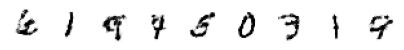

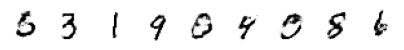

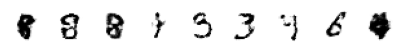

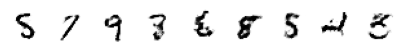

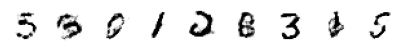

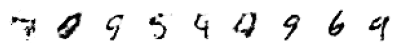

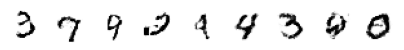

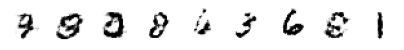

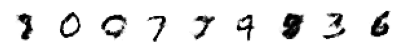

Epoch:100, Step:0, D-Loss:0.602, D-Acc:67.000, G-Loss:0.864
Epoch:100, Step:50, D-Loss:0.568, D-Acc:74.000, G-Loss:0.816
Epoch:100, Step:100, D-Loss:0.689, D-Acc:53.000, G-Loss:0.809
Epoch:100, Step:150, D-Loss:0.627, D-Acc:65.000, G-Loss:0.841
Epoch:100, Step:200, D-Loss:0.675, D-Acc:56.000, G-Loss:0.806
Epoch:100, Step:250, D-Loss:0.684, D-Acc:56.000, G-Loss:0.835
Epoch:100, Step:300, D-Loss:0.641, D-Acc:62.000, G-Loss:0.827
Epoch:100, Step:350, D-Loss:0.695, D-Acc:52.000, G-Loss:0.854
Epoch:100, Step:400, D-Loss:0.653, D-Acc:61.000, G-Loss:0.818
Epoch:100, Step:450, D-Loss:0.649, D-Acc:64.000, G-Loss:0.799
Epoch:101, Step:0, D-Loss:0.643, D-Acc:66.000, G-Loss:0.823
Epoch:101, Step:50, D-Loss:0.674, D-Acc:60.000, G-Loss:0.833
Epoch:101, Step:100, D-Loss:0.640, D-Acc:63.000, G-Loss:0.842
Epoch:101, Step:150, D-Loss:0.643, D-Acc:60.000, G-Loss:0.860
Epoch:101, Step:200, D-Loss:0.670, D-Acc:55.000, G-Loss:0.802
Epoch:101, Step:250, D-Loss:0.612, D-Acc:61.000, G-Loss:0.797
Epoch:101, Ste

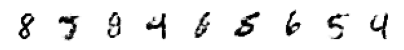

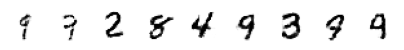

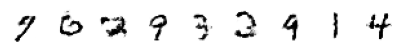

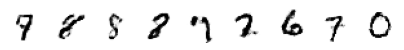

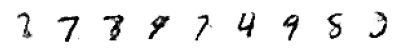

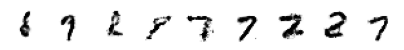

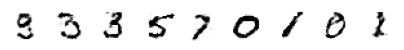

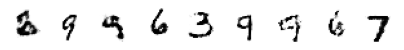

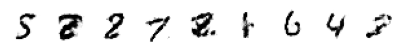

Epoch:110, Step:0, D-Loss:0.647, D-Acc:59.000, G-Loss:0.827
Epoch:110, Step:50, D-Loss:0.650, D-Acc:63.000, G-Loss:0.838
Epoch:110, Step:100, D-Loss:0.631, D-Acc:60.000, G-Loss:0.889
Epoch:110, Step:150, D-Loss:0.628, D-Acc:64.000, G-Loss:0.826
Epoch:110, Step:200, D-Loss:0.636, D-Acc:67.000, G-Loss:0.811
Epoch:110, Step:250, D-Loss:0.645, D-Acc:60.000, G-Loss:0.825
Epoch:110, Step:300, D-Loss:0.684, D-Acc:61.000, G-Loss:0.831
Epoch:110, Step:350, D-Loss:0.586, D-Acc:70.000, G-Loss:0.814
Epoch:110, Step:400, D-Loss:0.610, D-Acc:68.000, G-Loss:0.825
Epoch:110, Step:450, D-Loss:0.672, D-Acc:60.000, G-Loss:0.820
Epoch:111, Step:0, D-Loss:0.662, D-Acc:55.000, G-Loss:0.866
Epoch:111, Step:50, D-Loss:0.597, D-Acc:63.000, G-Loss:0.847
Epoch:111, Step:100, D-Loss:0.644, D-Acc:63.000, G-Loss:0.823
Epoch:111, Step:150, D-Loss:0.615, D-Acc:61.000, G-Loss:0.880
Epoch:111, Step:200, D-Loss:0.669, D-Acc:56.000, G-Loss:0.875
Epoch:111, Step:250, D-Loss:0.616, D-Acc:66.000, G-Loss:0.810
Epoch:111, Ste

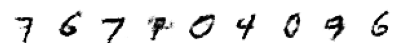

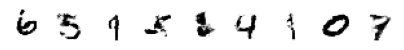

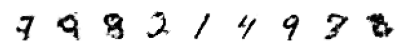

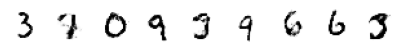

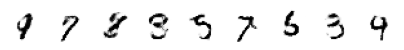

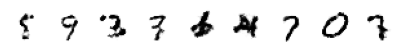

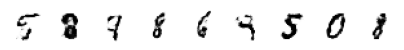

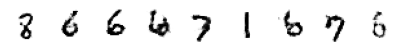

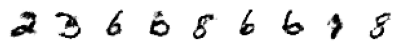

Epoch:120, Step:0, D-Loss:0.607, D-Acc:64.000, G-Loss:0.896
Epoch:120, Step:50, D-Loss:0.701, D-Acc:59.000, G-Loss:0.821
Epoch:120, Step:100, D-Loss:0.618, D-Acc:66.000, G-Loss:0.814
Epoch:120, Step:150, D-Loss:0.600, D-Acc:71.000, G-Loss:0.842
Epoch:120, Step:200, D-Loss:0.666, D-Acc:63.000, G-Loss:0.905
Epoch:120, Step:250, D-Loss:0.677, D-Acc:61.000, G-Loss:0.838
Epoch:120, Step:300, D-Loss:0.591, D-Acc:66.000, G-Loss:0.846
Epoch:120, Step:350, D-Loss:0.608, D-Acc:65.000, G-Loss:0.829
Epoch:120, Step:400, D-Loss:0.654, D-Acc:63.000, G-Loss:0.905
Epoch:120, Step:450, D-Loss:0.681, D-Acc:58.000, G-Loss:0.864
Epoch:121, Step:0, D-Loss:0.650, D-Acc:67.000, G-Loss:0.904
Epoch:121, Step:50, D-Loss:0.665, D-Acc:59.000, G-Loss:0.801
Epoch:121, Step:100, D-Loss:0.628, D-Acc:69.000, G-Loss:0.839
Epoch:121, Step:150, D-Loss:0.664, D-Acc:63.000, G-Loss:0.806
Epoch:121, Step:200, D-Loss:0.647, D-Acc:63.000, G-Loss:0.831
Epoch:121, Step:250, D-Loss:0.714, D-Acc:51.000, G-Loss:0.845
Epoch:121, Ste

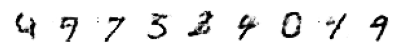

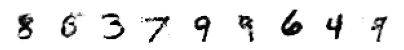

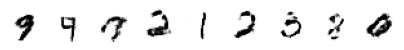

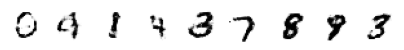

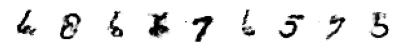

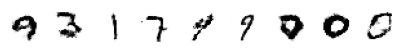

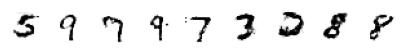

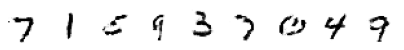

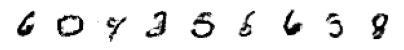

Epoch:130, Step:0, D-Loss:0.634, D-Acc:62.000, G-Loss:0.801
Epoch:130, Step:50, D-Loss:0.602, D-Acc:60.000, G-Loss:0.813
Epoch:130, Step:100, D-Loss:0.563, D-Acc:74.000, G-Loss:0.879
Epoch:130, Step:150, D-Loss:0.655, D-Acc:56.000, G-Loss:0.928
Epoch:130, Step:200, D-Loss:0.629, D-Acc:65.000, G-Loss:0.881
Epoch:130, Step:250, D-Loss:0.673, D-Acc:58.000, G-Loss:0.869
Epoch:130, Step:300, D-Loss:0.583, D-Acc:70.000, G-Loss:0.890
Epoch:130, Step:350, D-Loss:0.644, D-Acc:65.000, G-Loss:0.833
Epoch:130, Step:400, D-Loss:0.662, D-Acc:59.000, G-Loss:0.836
Epoch:130, Step:450, D-Loss:0.670, D-Acc:59.000, G-Loss:0.890
Epoch:131, Step:0, D-Loss:0.616, D-Acc:64.000, G-Loss:0.866
Epoch:131, Step:50, D-Loss:0.600, D-Acc:69.000, G-Loss:0.868
Epoch:131, Step:100, D-Loss:0.661, D-Acc:66.000, G-Loss:0.887
Epoch:131, Step:150, D-Loss:0.627, D-Acc:59.000, G-Loss:0.879
Epoch:131, Step:200, D-Loss:0.665, D-Acc:59.000, G-Loss:0.793
Epoch:131, Step:250, D-Loss:0.627, D-Acc:55.000, G-Loss:0.875
Epoch:131, Ste

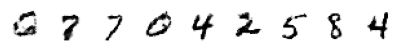

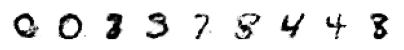

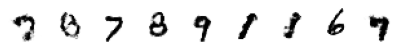

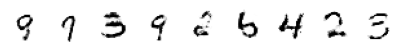

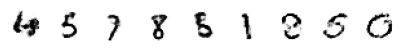

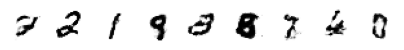

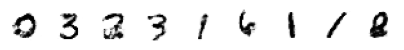

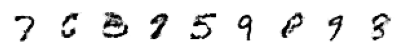

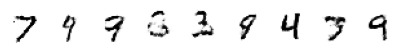

Epoch:140, Step:0, D-Loss:0.655, D-Acc:60.000, G-Loss:0.867
Epoch:140, Step:50, D-Loss:0.645, D-Acc:65.000, G-Loss:0.830
Epoch:140, Step:100, D-Loss:0.618, D-Acc:64.000, G-Loss:0.876
Epoch:140, Step:150, D-Loss:0.612, D-Acc:70.000, G-Loss:0.862
Epoch:140, Step:200, D-Loss:0.602, D-Acc:68.000, G-Loss:0.840
Epoch:140, Step:250, D-Loss:0.612, D-Acc:63.000, G-Loss:0.822
Epoch:140, Step:300, D-Loss:0.655, D-Acc:62.000, G-Loss:0.848
Epoch:140, Step:350, D-Loss:0.659, D-Acc:64.000, G-Loss:0.870
Epoch:140, Step:400, D-Loss:0.645, D-Acc:61.000, G-Loss:0.847
Epoch:140, Step:450, D-Loss:0.581, D-Acc:71.000, G-Loss:0.893
Epoch:141, Step:0, D-Loss:0.651, D-Acc:60.000, G-Loss:0.830
Epoch:141, Step:50, D-Loss:0.619, D-Acc:67.000, G-Loss:0.890
Epoch:141, Step:100, D-Loss:0.562, D-Acc:69.000, G-Loss:0.927
Epoch:141, Step:150, D-Loss:0.595, D-Acc:69.000, G-Loss:0.864
Epoch:141, Step:200, D-Loss:0.650, D-Acc:61.000, G-Loss:0.840
Epoch:141, Step:250, D-Loss:0.628, D-Acc:66.000, G-Loss:0.861
Epoch:141, Ste

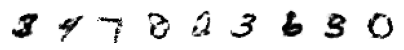

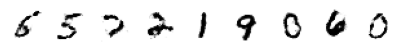

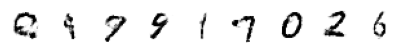

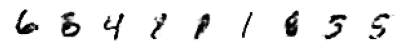

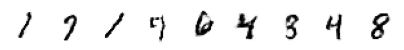

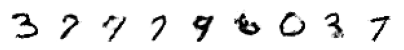

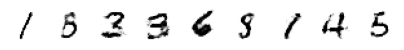

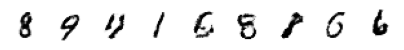

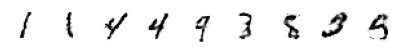

Epoch:150, Step:0, D-Loss:0.605, D-Acc:66.000, G-Loss:0.871
Epoch:150, Step:50, D-Loss:0.651, D-Acc:62.000, G-Loss:0.841
Epoch:150, Step:100, D-Loss:0.659, D-Acc:63.000, G-Loss:0.883
Epoch:150, Step:150, D-Loss:0.699, D-Acc:58.000, G-Loss:0.836
Epoch:150, Step:200, D-Loss:0.581, D-Acc:73.000, G-Loss:0.866
Epoch:150, Step:250, D-Loss:0.621, D-Acc:71.000, G-Loss:0.873
Epoch:150, Step:300, D-Loss:0.684, D-Acc:64.000, G-Loss:0.914
Epoch:150, Step:350, D-Loss:0.631, D-Acc:65.000, G-Loss:0.812
Epoch:150, Step:400, D-Loss:0.581, D-Acc:70.000, G-Loss:0.898
Epoch:150, Step:450, D-Loss:0.619, D-Acc:61.000, G-Loss:0.809
Epoch:151, Step:0, D-Loss:0.605, D-Acc:70.000, G-Loss:0.920
Epoch:151, Step:50, D-Loss:0.614, D-Acc:64.000, G-Loss:0.940
Epoch:151, Step:100, D-Loss:0.620, D-Acc:65.000, G-Loss:0.875
Epoch:151, Step:150, D-Loss:0.635, D-Acc:67.000, G-Loss:0.919
Epoch:151, Step:200, D-Loss:0.625, D-Acc:62.000, G-Loss:0.899
Epoch:151, Step:250, D-Loss:0.628, D-Acc:65.000, G-Loss:0.895
Epoch:151, Ste

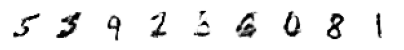

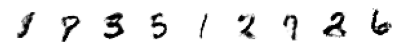

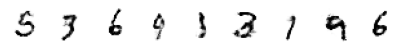

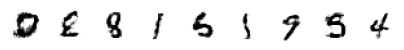

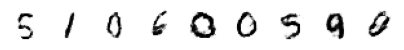

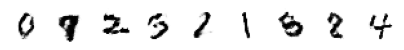

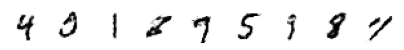

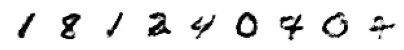

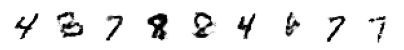

Epoch:160, Step:0, D-Loss:0.630, D-Acc:68.000, G-Loss:0.891
Epoch:160, Step:50, D-Loss:0.622, D-Acc:69.000, G-Loss:0.908
Epoch:160, Step:100, D-Loss:0.629, D-Acc:62.000, G-Loss:0.933
Epoch:160, Step:150, D-Loss:0.617, D-Acc:62.000, G-Loss:0.890
Epoch:160, Step:200, D-Loss:0.582, D-Acc:69.000, G-Loss:0.901
Epoch:160, Step:250, D-Loss:0.619, D-Acc:67.000, G-Loss:0.912
Epoch:160, Step:300, D-Loss:0.611, D-Acc:66.000, G-Loss:0.879
Epoch:160, Step:350, D-Loss:0.632, D-Acc:62.000, G-Loss:0.813
Epoch:160, Step:400, D-Loss:0.658, D-Acc:63.000, G-Loss:0.925
Epoch:160, Step:450, D-Loss:0.646, D-Acc:65.000, G-Loss:0.923
Epoch:161, Step:0, D-Loss:0.663, D-Acc:54.000, G-Loss:0.929
Epoch:161, Step:50, D-Loss:0.585, D-Acc:71.000, G-Loss:0.946
Epoch:161, Step:100, D-Loss:0.615, D-Acc:66.000, G-Loss:0.867
Epoch:161, Step:150, D-Loss:0.596, D-Acc:63.000, G-Loss:0.852
Epoch:161, Step:200, D-Loss:0.665, D-Acc:60.000, G-Loss:0.829
Epoch:161, Step:250, D-Loss:0.640, D-Acc:60.000, G-Loss:0.851
Epoch:161, Ste

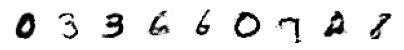

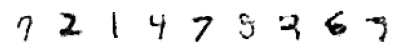

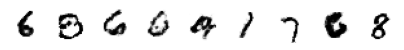

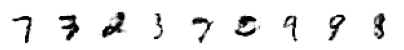

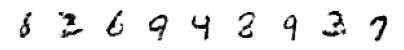

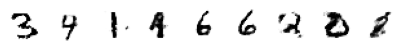

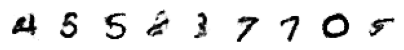

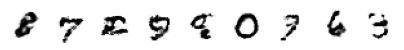

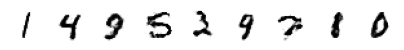

Epoch:170, Step:0, D-Loss:0.584, D-Acc:69.000, G-Loss:0.893
Epoch:170, Step:50, D-Loss:0.602, D-Acc:72.000, G-Loss:0.923
Epoch:170, Step:100, D-Loss:0.596, D-Acc:70.000, G-Loss:0.851
Epoch:170, Step:150, D-Loss:0.622, D-Acc:66.000, G-Loss:0.957
Epoch:170, Step:200, D-Loss:0.571, D-Acc:73.000, G-Loss:0.879
Epoch:170, Step:250, D-Loss:0.601, D-Acc:67.000, G-Loss:0.885
Epoch:170, Step:300, D-Loss:0.678, D-Acc:61.000, G-Loss:0.981
Epoch:170, Step:350, D-Loss:0.655, D-Acc:63.000, G-Loss:0.887
Epoch:170, Step:400, D-Loss:0.585, D-Acc:68.000, G-Loss:0.941
Epoch:170, Step:450, D-Loss:0.643, D-Acc:61.000, G-Loss:0.901
Epoch:171, Step:0, D-Loss:0.640, D-Acc:59.000, G-Loss:0.903
Epoch:171, Step:50, D-Loss:0.640, D-Acc:58.000, G-Loss:0.858
Epoch:171, Step:100, D-Loss:0.642, D-Acc:67.000, G-Loss:0.885
Epoch:171, Step:150, D-Loss:0.602, D-Acc:67.000, G-Loss:0.882
Epoch:171, Step:200, D-Loss:0.634, D-Acc:67.000, G-Loss:0.893
Epoch:171, Step:250, D-Loss:0.600, D-Acc:70.000, G-Loss:0.903
Epoch:171, Ste

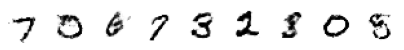

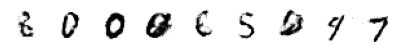

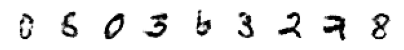

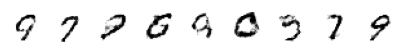

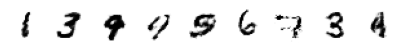

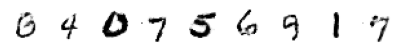

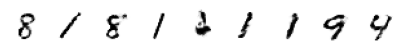

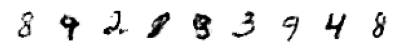

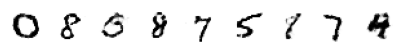

Epoch:180, Step:0, D-Loss:0.586, D-Acc:66.000, G-Loss:0.967
Epoch:180, Step:50, D-Loss:0.599, D-Acc:62.000, G-Loss:0.915
Epoch:180, Step:100, D-Loss:0.623, D-Acc:66.000, G-Loss:0.911
Epoch:180, Step:150, D-Loss:0.530, D-Acc:77.000, G-Loss:0.878
Epoch:180, Step:200, D-Loss:0.637, D-Acc:63.000, G-Loss:0.858
Epoch:180, Step:250, D-Loss:0.627, D-Acc:68.000, G-Loss:0.869
Epoch:180, Step:300, D-Loss:0.561, D-Acc:80.000, G-Loss:0.927
Epoch:180, Step:350, D-Loss:0.648, D-Acc:62.000, G-Loss:0.884
Epoch:180, Step:400, D-Loss:0.634, D-Acc:59.000, G-Loss:0.837
Epoch:180, Step:450, D-Loss:0.579, D-Acc:69.000, G-Loss:0.953
Epoch:181, Step:0, D-Loss:0.617, D-Acc:64.000, G-Loss:0.960
Epoch:181, Step:50, D-Loss:0.630, D-Acc:66.000, G-Loss:0.889
Epoch:181, Step:100, D-Loss:0.589, D-Acc:70.000, G-Loss:0.959
Epoch:181, Step:150, D-Loss:0.616, D-Acc:68.000, G-Loss:0.951
Epoch:181, Step:200, D-Loss:0.616, D-Acc:64.000, G-Loss:0.875
Epoch:181, Step:250, D-Loss:0.656, D-Acc:61.000, G-Loss:0.942
Epoch:181, Ste

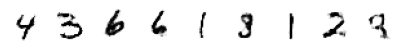

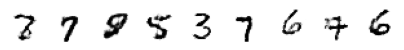

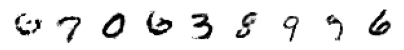

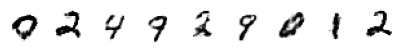

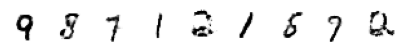

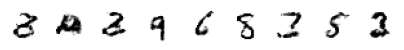

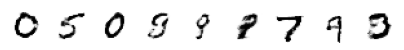

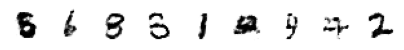

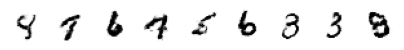

Epoch:190, Step:0, D-Loss:0.636, D-Acc:65.000, G-Loss:0.889
Epoch:190, Step:50, D-Loss:0.629, D-Acc:61.000, G-Loss:0.893
Epoch:190, Step:100, D-Loss:0.595, D-Acc:67.000, G-Loss:0.890
Epoch:190, Step:150, D-Loss:0.585, D-Acc:69.000, G-Loss:0.927
Epoch:190, Step:200, D-Loss:0.632, D-Acc:65.000, G-Loss:0.909
Epoch:190, Step:250, D-Loss:0.631, D-Acc:60.000, G-Loss:0.858
Epoch:190, Step:300, D-Loss:0.694, D-Acc:65.000, G-Loss:0.859
Epoch:190, Step:350, D-Loss:0.596, D-Acc:69.000, G-Loss:0.989
Epoch:190, Step:400, D-Loss:0.639, D-Acc:62.000, G-Loss:0.967
Epoch:190, Step:450, D-Loss:0.651, D-Acc:65.000, G-Loss:0.914
Epoch:191, Step:0, D-Loss:0.647, D-Acc:60.000, G-Loss:0.892
Epoch:191, Step:50, D-Loss:0.591, D-Acc:69.000, G-Loss:0.917
Epoch:191, Step:100, D-Loss:0.639, D-Acc:62.000, G-Loss:0.880
Epoch:191, Step:150, D-Loss:0.595, D-Acc:70.000, G-Loss:0.892
Epoch:191, Step:200, D-Loss:0.611, D-Acc:65.000, G-Loss:0.902
Epoch:191, Step:250, D-Loss:0.638, D-Acc:68.000, G-Loss:0.894
Epoch:191, Ste

In [ ]:
epochs = 200
batch_size = 100
steps = 500
noise_size = 50

losses_d = []
losses_g = []

for i in range(0, epochs):
    if (i%10 == 0):
        show_generator_results(generator_network)
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))
        
        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)
        
        gan_input = get_random_noise(batch_size, noise_size)
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))
        
        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = gan_model.train_on_batch(gan_input, gan_output)

        losses_d.append(loss_d[0])
        losses_g.append(loss_g)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))

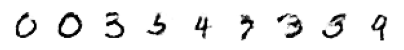

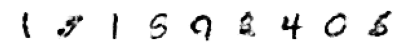

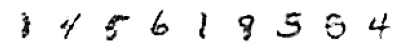

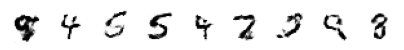

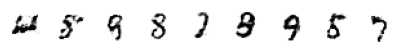

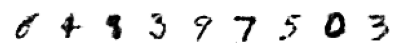

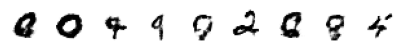

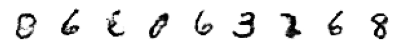

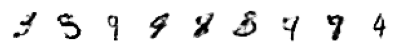

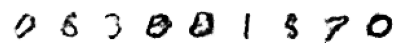

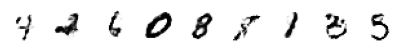

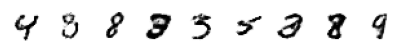

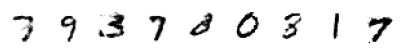

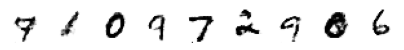

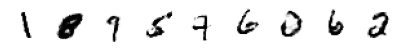

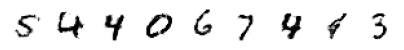

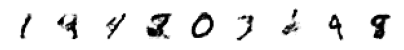

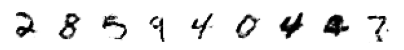

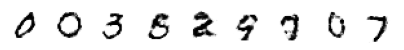

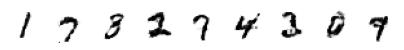

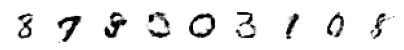

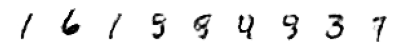

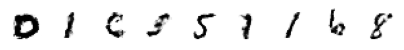

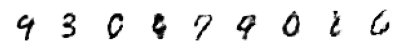

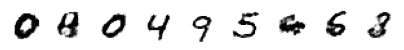

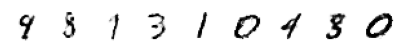

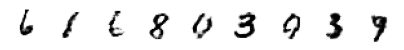

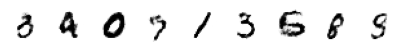

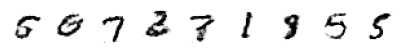

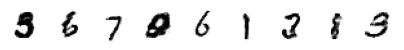

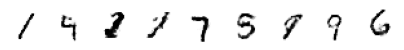

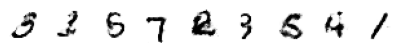

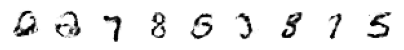

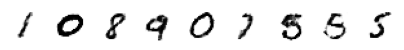

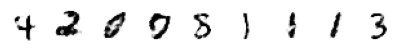

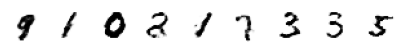

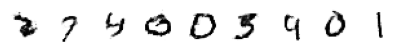

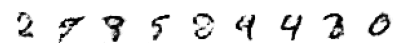

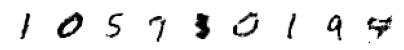

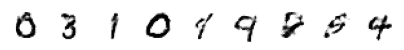

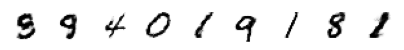

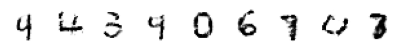

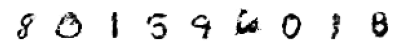

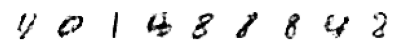

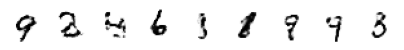

In [ ]:
#Generating Unlimited samples
for i in range(5):
    show_generator_results(generator_network)

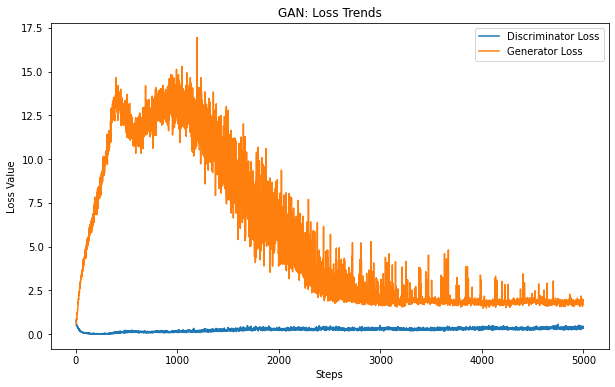

In [ ]:
steps = [i for i in range(len(losses_d))]
plt.figure(figsize=(10, 6))
plt.plot(losses_d[:5000])
plt.plot(losses_g[:5000])
plt.xlabel('Steps')
plt.ylabel('Loss Value')
plt.title("GAN: Loss Trends")
plt.legend(['Discriminator Loss', 'Generator Loss'])
plt.show()